# 1. Exploratory Data Analysis

In order to understand better the dataset at hand, an exploratory analysis is performed.

### Descriptive statistics

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/phishing_site_urls.csv')

In [4]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
df.shape

(549346, 2)

The base dataset consists of only two columns: URL and Label. The number of entries (rows) is 549346.

In [6]:
df.dtypes

URL      object
Label    object
dtype: object

In [7]:
df.describe()

,URL,Label
count,549346,549346
unique,507195,2
top,jhomitevd2abj3fk.onion.to/,good
freq,52,392924


In [8]:
# Missing values
print(df.isnull().sum())

URL      0
Label    0
dtype: int64


The dataset contains no missing values.

In [9]:
print(df['Label'].value_counts())

Label
good    392924
bad     156422
Name: count, dtype: int64


The dataset is clearly unbalanced. Thus, I will add newer 'bad' urls downloaded from PhishTank.

***

# 2. Data preprocessing

### Additional data

First, it is necessary to check the downloaded dataset in order to then process it and merge it with the first dataset.

In [10]:
df = pd.read_csv('dataset/verified_online.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62404 entries, 0 to 62403
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   phish_id           62404 non-null  int64 
 1   url                62404 non-null  object
 2   phish_detail_url   62404 non-null  object
 3   submission_time    62404 non-null  object
 4   verified           62404 non-null  object
 5   verification_time  62404 non-null  object
 6   online             62404 non-null  object
 7   target             62404 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.8+ MB


In [12]:
df.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8934215,http://allegrolokalnie.pl-81172.sbs,http://www.phishtank.com/phish_detail.php?phis...,2025-01-10T12:56:59+00:00,yes,2025-01-10T13:12:05+00:00,yes,Allegro
1,8934213,http://allegrolokalnie.oferta452378.buzz,http://www.phishtank.com/phish_detail.php?phis...,2025-01-10T12:56:53+00:00,yes,2025-01-10T13:12:05+00:00,yes,Allegro
2,8934212,http://allegrolokalnie.0v-89-c9a-19-ca.buzz,http://www.phishtank.com/phish_detail.php?phis...,2025-01-10T12:56:50+00:00,yes,2025-01-10T13:02:17+00:00,yes,Allegro
3,8934211,http://allegrolokalnie.pl-oferta2989289.buzz,http://www.phishtank.com/phish_detail.php?phis...,2025-01-10T12:56:36+00:00,yes,2025-01-10T13:02:17+00:00,yes,Allegro
4,8934203,https://musicalle.com.br/applic.ntbjanury/app/...,http://www.phishtank.com/phish_detail.php?phis...,2025-01-10T12:24:59+00:00,yes,2025-01-10T12:31:51+00:00,yes,Other


In [13]:
df = df[['url']] # get only url column

# rename 'url' into 'URL'
df.rename(columns={'url': 'URL'}, inplace=True)

# add new column 'Label' with value 'bad'
df['Label'] = 'bad'

df.head()

,URL,Label
0,http://allegrolokalnie.pl-81172.sbs,bad
1,http://allegrolokalnie.oferta452378.buzz,bad
2,http://allegrolokalnie.0v-89-c9a-19-ca.buzz,bad
3,http://allegrolokalnie.pl-oferta2989289.buzz,bad
4,https://musicalle.com.br/applic.ntbjanury/app/...,bad


I will remove the 'http(s)" prefix so to have consistency with the other dataset.

In [14]:
df['URL'] = df['URL'].str.replace(r'^https?://', '', regex=True)
df.head()

,URL,Label
0,allegrolokalnie.pl-81172.sbs,bad
1,allegrolokalnie.oferta452378.buzz,bad
2,allegrolokalnie.0v-89-c9a-19-ca.buzz,bad
3,allegrolokalnie.pl-oferta2989289.buzz,bad
4,musicalle.com.br/applic.ntbjanury/app/login.php,bad


In [15]:
output_file_path = 'dataset/extra_bad_dataset.csv'
df.to_csv(output_file_path, index=False)

print(f"Dataset saved to {output_file_path}")

Dataset saved to dataset/extra_bad_dataset.csv


Let's combine the datasets into one

In [16]:
df1 = pd.read_csv('dataset/phishing_site_urls.csv')
combined_df = pd.concat([df1, df], ignore_index=True)
combined_df.head()

output_combined_path = 'dataset/combined_dataset.csv'
combined_df.to_csv(output_combined_path, index=False)

print(f"Combined dataset saved to {output_combined_path}")

Combined dataset saved to dataset/combined_dataset.csv


In [17]:
num_duplicates = combined_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 42530


In [18]:
print(combined_df['Label'].value_counts())

Label
good    392924
bad     218826
Name: count, dtype: int64


In [19]:
combined_df['Label'].value_counts(normalize=True)

Label
good    0.642295
bad     0.357705
Name: proportion, dtype: float64

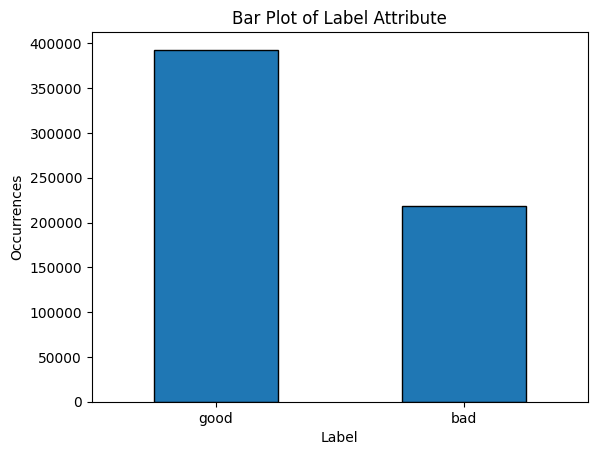

In [20]:
plt.figure()
combined_df['Label'].value_counts().plot(kind='bar', edgecolor='black')
plt.ylabel('Occurrences')
plt.xlabel('Label')
plt.title('Bar Plot of Label Attribute')
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Distribution of Label')

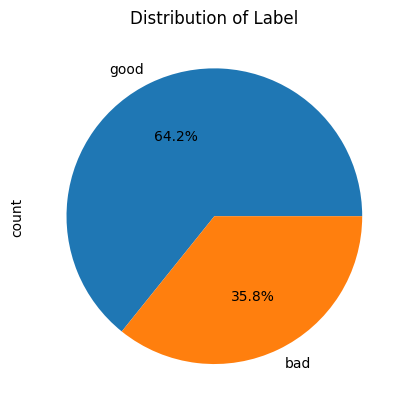

In [21]:
combined_df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Label')

### Duplicates removal

In [23]:
num_duplicates = combined_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 42530


In [25]:
df_cleaned = combined_df.drop_duplicates()
df_cleaned.to_csv('dataset/cleaned_dataset.csv', index=False) 

In [26]:
print(df_cleaned['Label'].value_counts())

Label
good    392897
bad     176323
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Label')

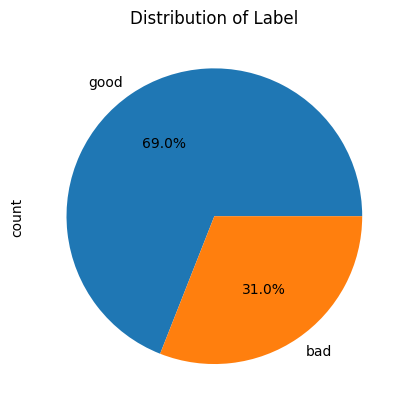

In [27]:
df_cleaned['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
# Add a title
plt.title('Distribution of Label')

Given that the addition of data has contributed only to a small degree to the class imbalance problem and considering the significant disproportion between the two parts, I will procede undersampling the good samples. This won't affect much the diversity of this class since its values were created mostly synthetically.

Before ongoing any kind of sampling process. I will first do feature generation.